---
title: GE
subtitle: Revisión datos técnicos
author: Chief Reliability
date: 2023-01-23
---

In [47]:
from narwhals import DataFrame

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import sys
from pathlib import Path


import pandas as pd
import polars as pl
import dagster as dg
from kdags.resources.dplyr import *
from kdags.resources.tidyr import *
from io import BytesIO
import pdfplumber

# from datetime import datetime
import re
import os
from kdags.definitions import *
from kdags.readr import *
import numpy as np

context = dg.build_asset_context()

from kdags.resources.ggplot import *
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from datetime import datetime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
dl = DataLake()
content = dl.read_bytes(
    f"abfs://bhp-analytics-data/MAINTENANCE/WORK_ORDERS_HISTORY/work_orders_history.parquet"
)
df = pd.read_parquet(BytesIO(content))

In [59]:
df.loc[
    (df["equipment_name"] == "TK399")
    & (df["end_date"] < datetime(2025, 1, 12))
    & (df["end_date"] > datetime(2024, 1, 12))
].sort_values("start_date", ascending=False)

,ot,description,priority,start_date,end_date,Revisión,equipment_name,updated_at,task_text,documents
313,418536697,IS:Reponer peldaño escalera flotante LD,Sched in Period,2025-01-09,2025-01-09,WK 02: 06.01.25 - 12.01.25 (Y25W02),TK399,2025-01-20 12:28:22.562,11.11.2024 17:51:00 UTC (LATISO)\n\n Cambiar p...,['peldaño escalera tk399.JPG']
323,418575660,Inst. de guarda polvo cilindro direc.,Sched in Period,2025-01-09,2025-01-09,WK 02: 06.01.25 - 12.01.25 (Y25W02),TK399,2025-01-20 12:28:45.054,09.12.2024 22:26:48 UTC (ZARALU)\n\n Se detect...,[]
319,418565026,CPH: Inspeccion eje levas y camfollower,Sched in Period,2025-01-08,2025-01-08,WK 02: 06.01.25 - 12.01.25 (Y25W02),TK399,2025-01-20 12:23:48.760,03.12.2024 21:09:18 UTC (CERDJO)\n\n\n\n Se re...,[]
1842,528378289,84D Serv CCE Insp Tolv Paso 6 TK399,Sched Day Defined,2025-01-08,2025-01-08,WK 02: 06.01.25 - 12.01.25 (Y25W02),TK399,2025-01-20 12:26:28.368,08.01.2025 09:01:53 UTC (LAITN)\n Personal Con...,"['439519698.pdf', 'Pauta Tolva Minetec KOM 960..."
1845,528378292,28D Mec CCE Insp Sist Crit Incen TK399,Sched Day Defined,2025-01-08,2025-01-08,WK 02: 06.01.25 - 12.01.25 (Y25W02),TK399,2025-01-20 12:26:52.181,08.01.2025 08:11:28 UTC (MATUFH)\n Se realiza ...,['439519701.pdf']
...,...,...,...,...,...,...,...,...,...,...
1023,436066473,Sin retrovisor izquierdo,Urgent,2024-01-25,2024-01-25,None,TK399,2025-01-19 22:40:56.403,25.01.2024 06:14:51 UTC (AROSPA)\n Brief descr...,[]
1021,436055561,Inst. Pivote Tolva,Immediate,2024-01-18,2024-01-18,None,TK399,2025-01-19 22:40:17.969,18.01.2024 03:11:21 UTC (RIVEGS)\n Brief descr...,[]
1022,436055894,Cph op inspección preventiva,Immediate,2024-01-18,2024-01-18,None,TK399,2025-01-19 22:40:37.181,18.01.2024 09:44:59 UTC (CRUZJUANA)\n Brief de...,[]
1020,436055508,Cbio. Mang. Enfriam Frenos,Immediate,2024-01-18,2024-01-18,None,TK399,2025-01-19 22:39:58.749,18.01.2024 03:22:09 UTC (RIVEGS)\n Brief descr...,[]


In [ ]:
19.10.2024 21:32:40 UTC (SILVMM1)
 MC: Cbiar Susp. Trasera Izq, Rotula superior quebrada. 18.951 Hrs.
 Se adj.TL
 08.12.2024 09:41:51 UTC (HUERCA1)
 Se ingresa equipo a nave
 se realiza desconexion de lineas hidraulicas y electricas
 se descarga suspencion
 se realiza desmontaje de suspencion
 se retiran restos de pasador interiores, superior e inferior.
 se ingresa suspencion y kita nave 20

 PENDIENTE:
 retirar restos de pasador exteriores, superior e inferior
 realizar cambio de camisas
 continuar con montaje componente
 11.12.2024 08:45:33 UTC (HUERCA1)
 Se retiran restos de pasador exteriores, superior e inferior
 se realiza cambio de camisas
 se realiza montaje de conjunto
 se realiza instalación de periféricos
 se realiza procedimiento de carga
 se instalan pernos y tuerca seguro y se torquean
 equipo queda disponible

In [57]:
df.loc[
    (df["equipment_name"] == "TK399")
    & (df["end_date"] < datetime(2025, 1, 12))
    & (df["end_date"] > datetime(2024, 1, 12))
].sort_values("start_date", ascending=False).task_text.to_list()

['11.11.2024 17:51:00 UTC (LATISO)\n\n Cambiar peldaño en escalera flotante , costado derecho, ya que esta se\n encuentra fracturada.\n\n\n\n\n Cambiar peldaño en escalera flotante , costado derecho, ya que esta se\n encuentra fracturada.\n\n Repuestos:\n EL0827TREAD X 1\n MM0714 FLATWASHER - M12 (HARDENED) X 2\n EL0828 FLAT X 2\n MM0623 CAPSCREW - M12 X 1.75 X 60 X 2\n\n 1 MECANICO X 1 HORA\n\n\n\n\n\n 08.01.2025 22:24:01 UTC (MORAAA)\n Trabajos realizados por personal KMS SPOT:\n • Se cambia peldaño escalera flotante lado derecho por encontrarse en\n mal estado, queda operativo',
 '09.12.2024 22:26:48 UTC (ZARALU)\n\n Se detecta falta de guarda polvo del vástago de cilindro de dirección\n lado derecho.\n\n\n Se genera aviso programado para realizar reposición e instalación de\n gustada polvo del cilindro de dirección lado derecho.\n\n\nSe requiere 01 técnico mecánico por 01 hrs. para la instalación y\n reposición del guarda polvo de cilindro de dirección.\n Se requiere los siguiente 

In [2]:
result = kdefs.get_job_def("ge_job").execute_in_process(raise_on_error=False)

2025-03-18 13:55:51 -0300 - dagster - DEBUG - ge_job - 8aade9d8-b13e-4416-b809-ab28b427b74a - 28096 - RUN_START - Started execution of run for "ge_job".
2025-03-18 13:55:51 -0300 - dagster - DEBUG - ge_job - 8aade9d8-b13e-4416-b809-ab28b427b74a - 28096 - ENGINE_EVENT - Executing steps in process (pid: 28096)
2025-03-18 13:55:51 -0300 - dagster - DEBUG - ge_job - 8aade9d8-b13e-4416-b809-ab28b427b74a - 28096 - RESOURCE_INIT_STARTED - Starting initialization of resources [io_manager].
2025-03-18 13:55:51 -0300 - dagster - DEBUG - ge_job - 8aade9d8-b13e-4416-b809-ab28b427b74a - 28096 - RESOURCE_INIT_SUCCESS - Finished initialization of resources [io_manager].
2025-03-18 13:55:51 -0300 - dagster - DEBUG - ge_job - 8aade9d8-b13e-4416-b809-ab28b427b74a - 28096 - LOGS_CAPTURED - Started capturing logs in process (pid: 28096).
2025-03-18 13:55:51 -0300 - dagster - DEBUG - ge_job - 8aade9d8-b13e-4416-b809-ab28b427b74a - 28096 - read_op_file_idx - STEP_START - Started execution of step "read_op_f

In [4]:
result.output_for_node("read_op_file_idx").select(
    ["file_path", "equipment_name"]
).to_dicts()[0]["file_path"]

'C:\\Users\\vales\\BHPDATA\\DDMM\\06 Descargas de datos camiones\\TK285\\285_dsc_20220812-092058_2.zip'

In [9]:
df = (
    result.output_for_node("mutate_raw_events")
    .filter(pl.col("record_dt").is_not_null())
    .filter(pl.col("recording_type").is_in(["Log", "Log+"]))
    .filter(pl.col("parameter_code") == "E647S1")
)
df.select(["header_equipment_name", "record_dt"]).group_by(
    ["header_equipment_name"]
).head(20).write_csv("test.csv")
# df.filter(pl.col(""))

In [34]:
df["recording_type"].unique()

recording_type
str
"""Log+"""


In [46]:
decimal_number = 4114
binary_number = bin(decimal_number)
print(binary_number[2:])  # Output: 0b100100

1000000010010


Data shape after filtering: (62311, 12)
Year range: 2020 to 2024

Yearly average failures:
   year  avg_failures  std_failures  equipment_count
0  2020     84.000000           NaN                1
1  2021     60.300000     46.495042               10
2  2022    438.404762    275.803576               42
3  2023    471.391304    375.962674               46
4  2024    473.666667    419.917037               45

Selected equipment for monthly analysis: TK871 with 4088 failures

Monthly failures for selected equipment:
   year  month month_name  failure_count year_month
0  2021     11        Nov              6   2021-Nov
1  2021     12        Dec            117   2021-Dec
2  2022      1        Jan            132   2022-Jan
3  2022      2        Feb            122   2022-Feb
4  2022      3        Mar            154   2022-Mar


(<Figure size 1000x600 with 1 Axes>, <Figure size 1200x600 with 1 Axes>)

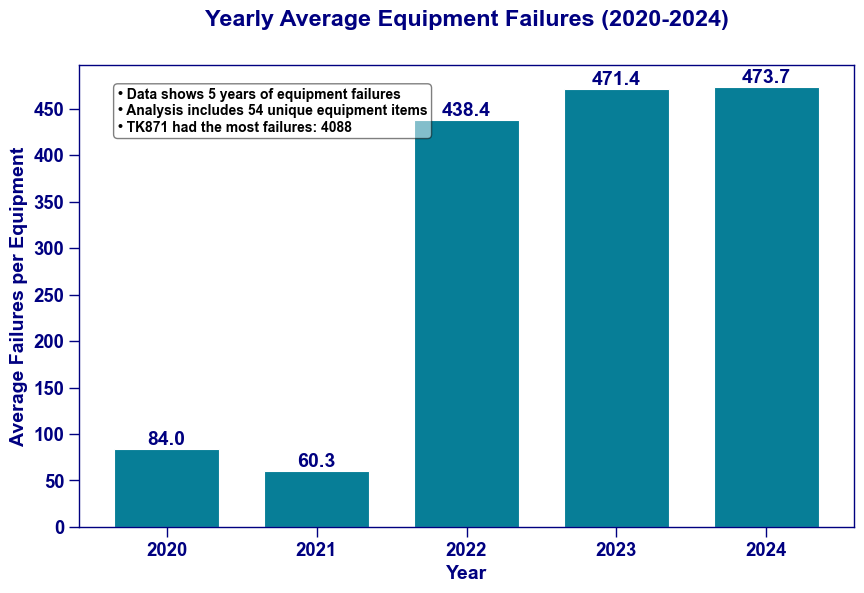

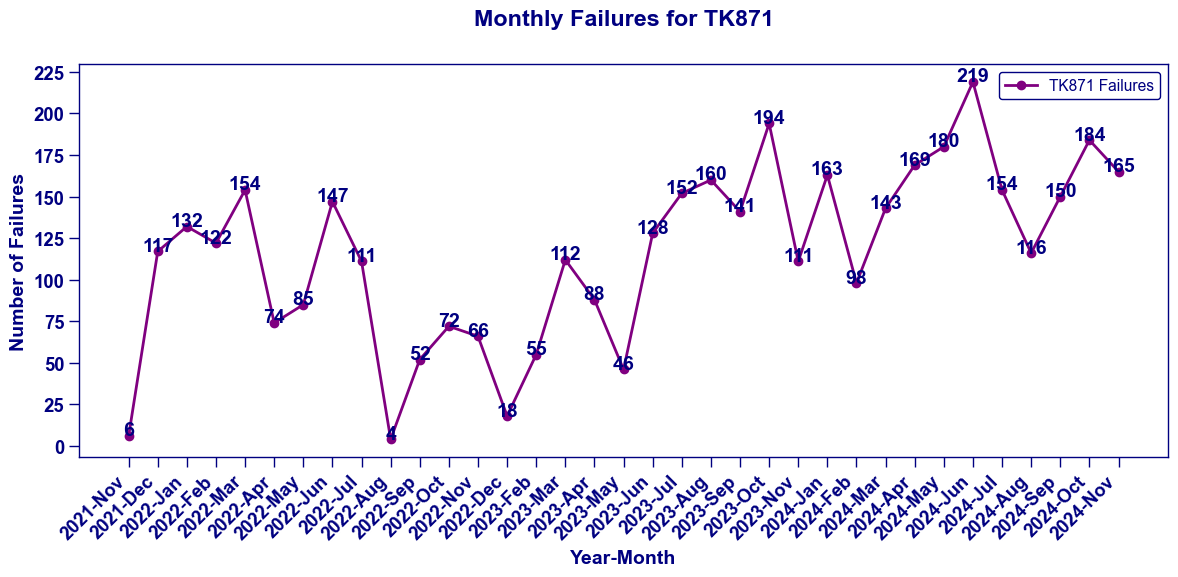

In [11]:
def analyze_equipment_failures(df):
    """Analyze equipment failures and create visualizations using the existing GGPrism theme"""
    # Read the CSV file

    # Convert datetime strings to datetime objects
    df["record_dt"] = pd.to_datetime(df["record_dt"])

    # Add year and month columns for analysis
    df["year"] = df["record_dt"].dt.year
    df["month"] = df["record_dt"].dt.month
    df["month_name"] = df["record_dt"].dt.strftime("%b")

    # Filter out years that seem like data errors (keeping 2020-2024)
    df = df[(df["year"] >= 2022) & (df["year"] <= 2024)]

    print(f"Data shape after filtering: {df.shape}")
    print(f"Year range: {df['year'].min()} to {df['year'].max()}")

    # Calculate yearly failures by equipment
    yearly_equipment_failures = (
        df.groupby(["header_equipment_name", "year"])
        .size()
        .reset_index(name="failure_count")
    )

    # Calculate overall yearly average failures across all equipment
    yearly_avg_failures = (
        yearly_equipment_failures.groupby("year")
        .agg(
            avg_failures=("failure_count", "mean"),
            std_failures=("failure_count", "std"),
            equipment_count=("failure_count", "count"),
        )
        .reset_index()
    )

    print("\nYearly average failures:")
    print(yearly_avg_failures)

    # Find equipment with most failures for monthly analysis
    equipment_failures = (
        df.groupby("header_equipment_name").size().reset_index(name="total_failures")
    )
    equipment_failures = equipment_failures.sort_values(
        "total_failures", ascending=False
    )

    sample_equipment = "TK871"
    print(
        f"\nSelected equipment for monthly analysis: {sample_equipment} with {equipment_failures.iloc[0]['total_failures']} failures"
    )

    # Calculate monthly failures for the selected equipment
    monthly_failures = (
        df[df["header_equipment_name"] == sample_equipment]
        .groupby(["year", "month", "month_name"])
        .size()
        .reset_index(name="failure_count")
    )
    monthly_failures["year_month"] = (
        monthly_failures["year"].astype(str) + "-" + monthly_failures["month_name"]
    )
    monthly_failures = monthly_failures.sort_values(["year", "month"])

    print("\nMonthly failures for selected equipment:")
    print(monthly_failures.head())

    # Create GGPrism theme instance using your existing implementation
    theme = GGPrism()

    # PLOT 1: Yearly Average Failures
    fig1, ax1 = theme.create_figure(figsize=(10, 6))

    # Create bar plot for yearly averages
    bars = ax1.bar(
        yearly_avg_failures["year"],
        yearly_avg_failures["avg_failures"],
        width=0.7,
        color=theme.COLORS[0],
        edgecolor="white",
        linewidth=0.8,
    )

    # Add data labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 0.1,
            f"{height:.1f}",
            ha="center",
            va="bottom",
            color=theme.FIXED_COLORS["axis_title_color"],
            fontweight="bold",
        )

    # Apply theme styling and finalize the plot
    theme.apply_theme(ax1)
    theme.style_title(ax1, "Yearly Average Equipment Failures (2020-2024)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Average Failures per Equipment")

    # Add annotations with insights
    textstr = (
        f"• Data shows {len(yearly_avg_failures)} years of equipment failures\n"
        f"• Analysis includes {len(equipment_failures)} unique equipment items\n"
        f"• {sample_equipment} had the most failures: {equipment_failures.iloc[0]['total_failures']}"
    )

    props = dict(boxstyle="round", facecolor="white", alpha=0.5)
    ax1.text(
        0.05,
        0.95,
        textstr,
        transform=ax1.transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=props,
    )

    # PLOT 2: Monthly Failures for Selected Equipment
    fig2, ax2 = theme.create_figure(figsize=(12, 6))

    # Create line plot for monthly failures
    ax2.plot(
        monthly_failures["year_month"],
        monthly_failures["failure_count"],
        marker="o",
        markersize=6,
        linewidth=2,
        color=theme.COLORS[1],  # Use second color (purple) for variety
        label=f"{sample_equipment} Failures",
    )

    # Add data labels on points
    for i, row in monthly_failures.iterrows():
        ax2.text(
            i,
            row["failure_count"] + 0.3,
            str(row["failure_count"]),
            ha="center",
            color=theme.FIXED_COLORS["axis_title_color"],
            fontweight="bold",
        )

    # Rotate x-axis labels for better readability
    plt.setp(ax2.get_xticklabels(), rotation=45, ha="right")

    # Apply theme styling and finalize the plot
    theme.apply_theme(ax2)
    theme.style_title(ax2, f"Monthly Failures for {sample_equipment}")
    ax2.set_xlabel("Year-Month")
    ax2.set_ylabel("Number of Failures")
    theme.style_legend(ax2)

    # Make sure plots look good
    plt.tight_layout()

    # Save plots
    fig1.savefig("yearly_equipment_failures.png", dpi=300, bbox_inches="tight")
    fig2.savefig(
        f"{sample_equipment}_monthly_failures.png", dpi=300, bbox_inches="tight"
    )

    return fig1, fig2


analyze_equipment_failures(df.to_pandas())

Data shape after filtering: (61624, 14)
Year range: 2022 to 2024

Yearly average failures:
   year  avg_failures  std_failures  equipment_count
0  2022    438.404762    275.803576               42
1  2023    471.391304    375.962674               46
2  2024    473.666667    419.917037               45

Selected equipment for monthly analysis: TK858 with 3965 failures


(<Figure size 1000x600 with 1 Axes>,
 <Figure size 1400x700 with 1 Axes>,
 <Figure size 1400x700 with 1 Axes>,
 <Figure size 1800x800 with 3 Axes>)

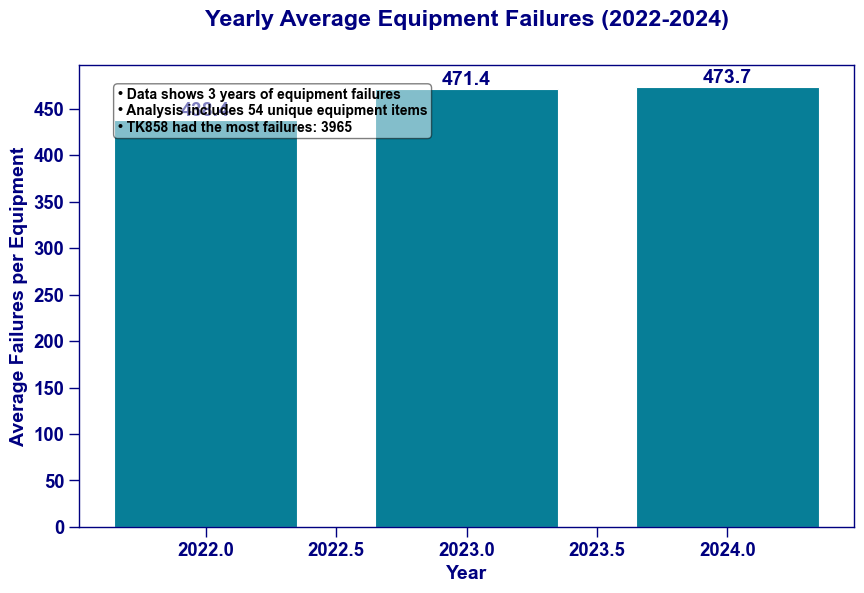

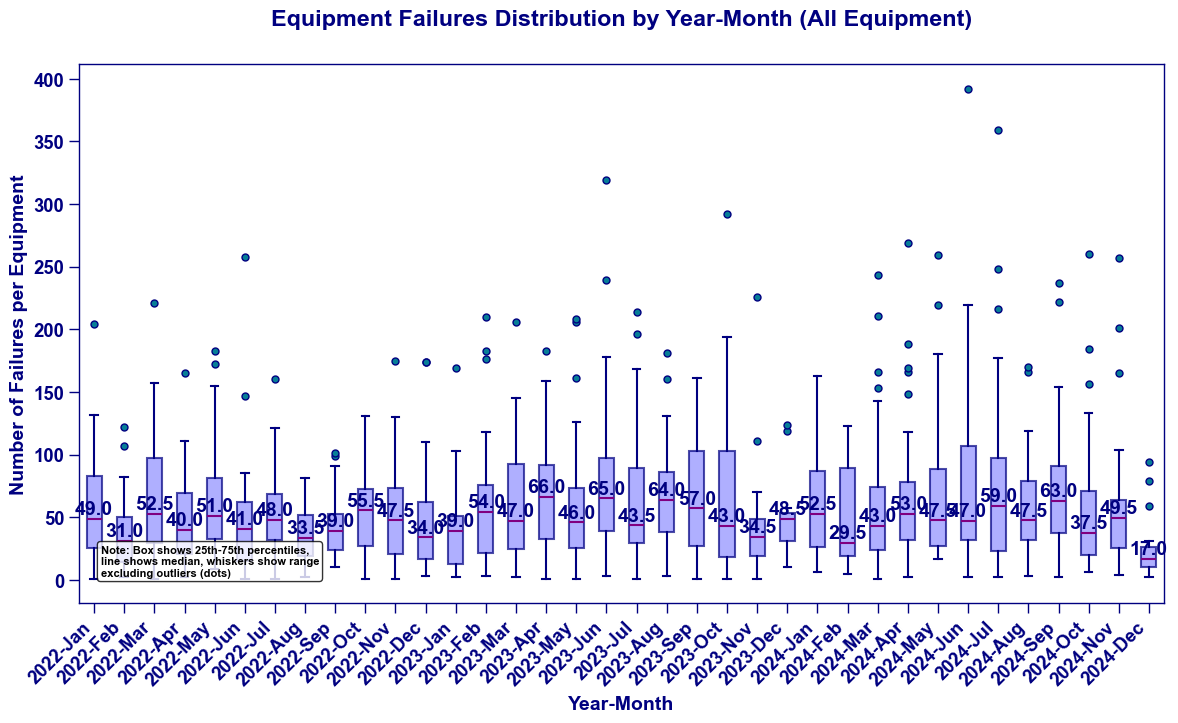

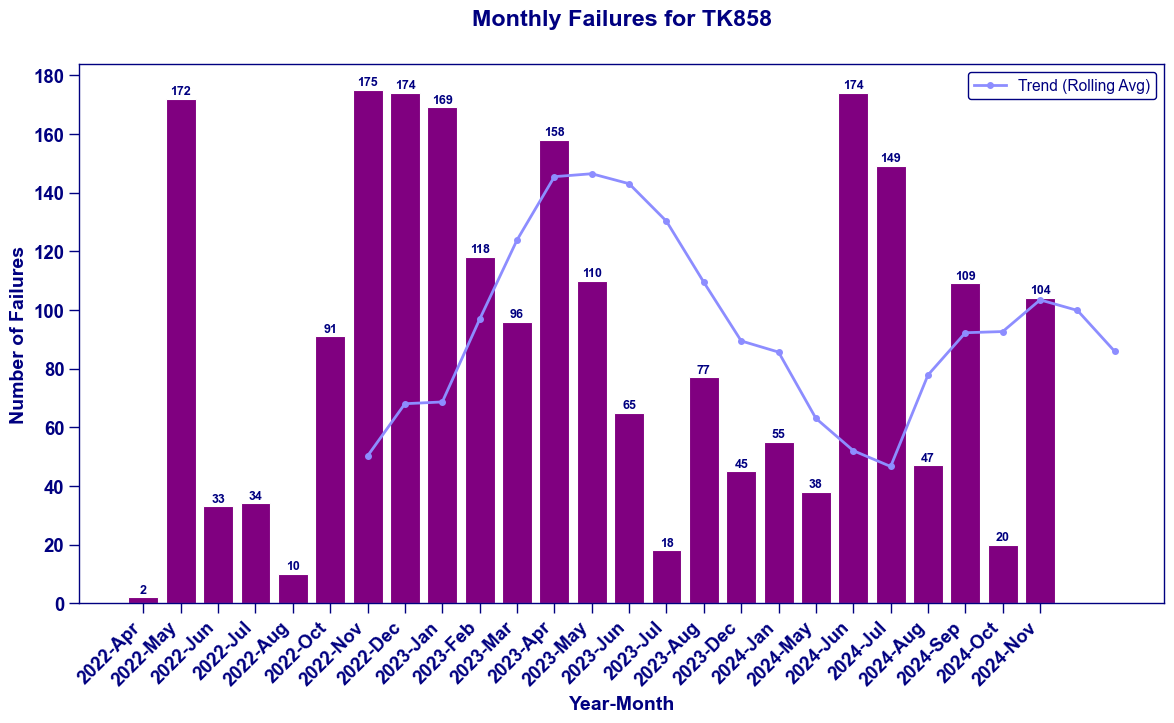

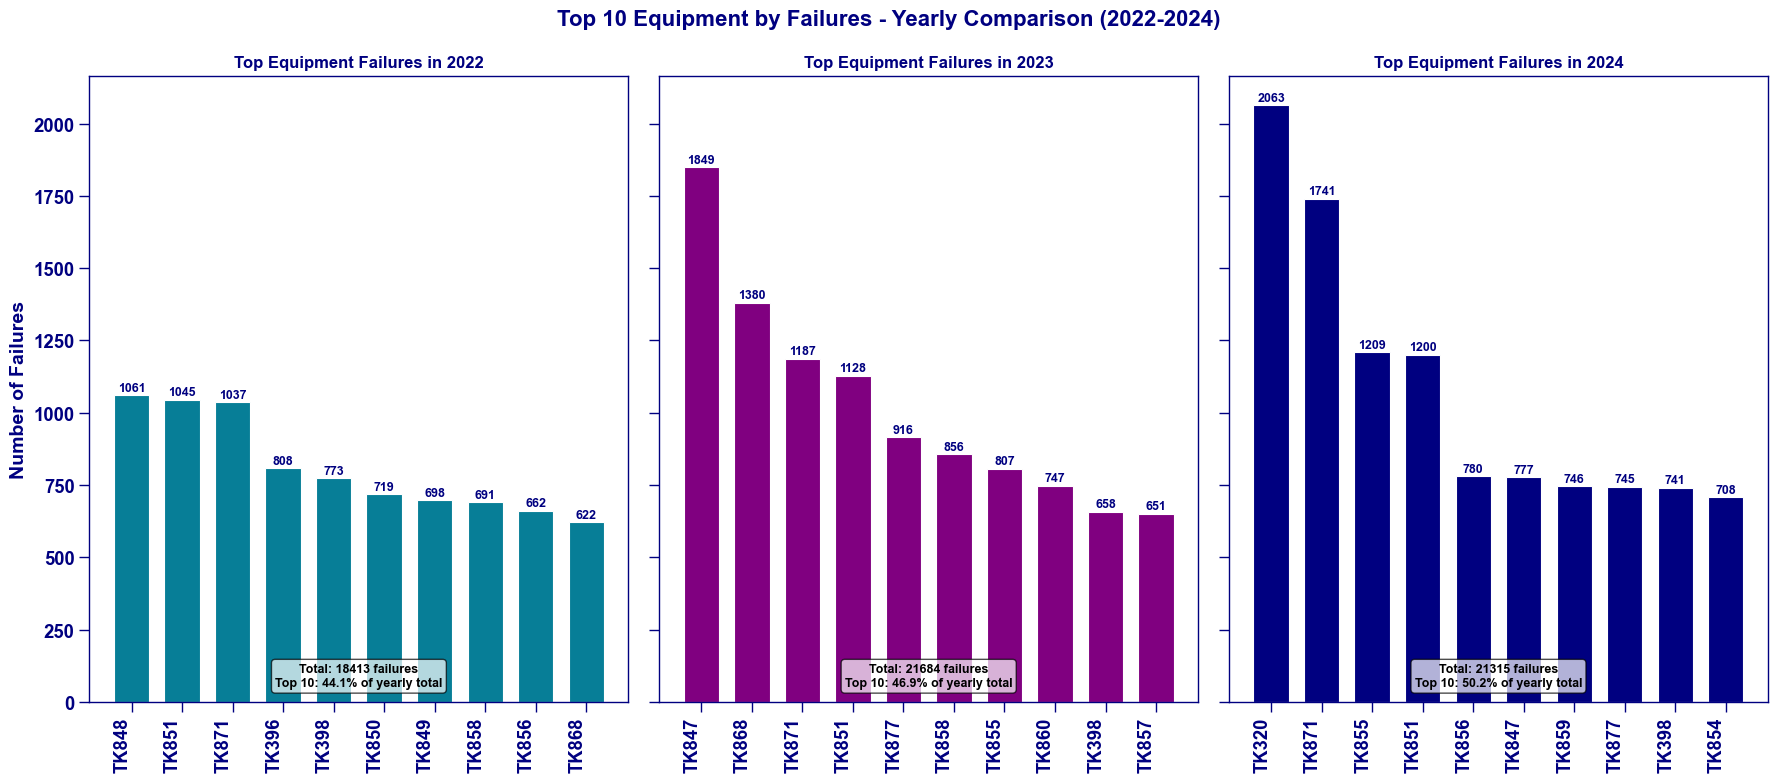

In [31]:
def create_yearly_top_equipment_plot(df, theme):
    """Create a plot showing top equipment by failures for each year"""
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np

    # Calculate yearly failures by equipment
    yearly_equipment_failures = (
        df.groupby(["header_equipment_name", "year"])
        .size()
        .reset_index(name="failure_count")
    )

    # Create figure
    fig, axes = plt.subplots(
        1, 3, figsize=(18, 8), sharey=True
    )  # 3 subplots for 2022, 2023, 2024

    # Get unique years
    years = sorted(yearly_equipment_failures["year"].unique())

    # For each year, create a subplot with top equipment
    for i, year in enumerate(years):
        # Filter data for this year
        year_data = yearly_equipment_failures[yearly_equipment_failures["year"] == year]

        # Get top 10 equipment for this year
        top_equipment = year_data.nlargest(10, "failure_count")

        # Sort for better visualization (descending for vertical bar chart)
        top_equipment = top_equipment.sort_values("failure_count", ascending=False)

        # Create subplot for this year
        ax = axes[i]

        # Create bar chart
        bars = ax.bar(
            top_equipment["header_equipment_name"],
            top_equipment["failure_count"],
            color=theme.COLORS[i % len(theme.COLORS)],  # Different color for each year
            edgecolor="white",
            linewidth=0.8,
            width=0.7,
        )

        # Add data labels on top of bars
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2.0,
                height + 5,
                f"{int(height)}",
                ha="center",
                va="bottom",
                color=theme.FIXED_COLORS["axis_title_color"],
                fontweight="bold",
                fontsize=9,
            )

        # Rotate x-axis labels for better readability
        plt.setp(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)

        # Set title and axis labels
        ax.set_title(
            f"Top Equipment Failures in {year}",
            color=theme.FIXED_COLORS["plot_title_color"],
            fontweight="bold",
            fontsize=12,
        )

        ax.set_ylabel("Number of Failures" if i == 0 else "")

        # Add total count for this year
        total_failures = year_data["failure_count"].sum()
        top_failures = top_equipment["failure_count"].sum()
        percentage = (top_failures / total_failures) * 100

        ax.text(
            0.5,
            0.02,
            f"Total: {total_failures} failures\nTop 10: {percentage:.1f}% of yearly total",
            ha="center",
            va="bottom",
            transform=ax.transAxes,
            bbox=dict(facecolor="white", alpha=0.7, boxstyle="round"),
            fontsize=9,
        )

        # Apply theme styling
        theme.apply_theme(ax)

    # Set overall title
    fig.suptitle(
        "Top 10 Equipment by Failures - Yearly Comparison (2022-2024)",
        fontsize=16,
        fontweight="bold",
        color=theme.FIXED_COLORS["plot_title_color"],
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the overall title

    # Save plot
    fig.savefig("yearly_top_equipment_comparison.png", dpi=300, bbox_inches="tight")

    return fig


def analyze_equipment_failures(df, sample_equipment):
    """Analyze equipment failures with corrected boxplot approach"""
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    from datetime import datetime
    from kdags.resources.ggplot.ggprism import GGPrism

    # Convert datetime strings to datetime objects
    df["record_dt"] = pd.to_datetime(df["record_dt"])

    # Add year and month columns for analysis
    df["year"] = df["record_dt"].dt.year
    df["month"] = df["record_dt"].dt.month
    df["month_name"] = df["record_dt"].dt.strftime("%b")
    df["year_month"] = df["record_dt"].dt.strftime(
        "%Y-%m"
    )  # For grouping by year-month
    df["year_month_label"] = df["record_dt"].dt.strftime("%Y-%b")  # For display

    # Filter out years that seem like data errors (keeping 2020-2024)
    df = df[(df["year"] >= 2022) & (df["year"] <= 2024)]

    print(f"Data shape after filtering: {df.shape}")
    print(f"Year range: {df['year'].min()} to {df['year'].max()}")

    # Calculate yearly failures by equipment
    yearly_equipment_failures = (
        df.groupby(["header_equipment_name", "year"])
        .size()
        .reset_index(name="failure_count")
    )

    # Calculate overall yearly average failures across all equipment
    yearly_avg_failures = (
        yearly_equipment_failures.groupby("year")
        .agg(
            avg_failures=("failure_count", "mean"),
            std_failures=("failure_count", "std"),
            equipment_count=("failure_count", "count"),
        )
        .reset_index()
    )

    print("\nYearly average failures:")
    print(yearly_avg_failures)

    # Find equipment with most failures for monthly analysis
    equipment_failures = (
        df.groupby("header_equipment_name").size().reset_index(name="total_failures")
    )
    equipment_failures = equipment_failures.sort_values(
        "total_failures", ascending=False
    )

    # sample_equipment = equipment_failures.iloc[0]["header_equipment_name"]
    print(
        f"\nSelected equipment for monthly analysis: {sample_equipment} with {equipment_failures.iloc[0]['total_failures']} failures"
    )

    # Calculate monthly failures for the selected equipment by year-month
    monthly_failures = (
        df[df["header_equipment_name"] == sample_equipment]
        .groupby(["year_month", "year_month_label"])
        .size()
        .reset_index(name="failure_count")
    )
    monthly_failures = monthly_failures.sort_values("year_month")

    # Calculate failures by equipment for each year-month combination (for the corrected box plot)
    equipment_year_month = (
        df.groupby(["header_equipment_name", "year_month", "year_month_label"])
        .size()
        .reset_index(name="failure_count")
    )

    # Create GGPrism theme instance using your existing implementation
    theme = GGPrism()

    # 1. YEARLY AVERAGE FAILURES PLOT (Keep as is, since it was good)
    fig1, ax1 = theme.create_figure(figsize=(10, 6))

    # Create bar plot for yearly averages
    bars = ax1.bar(
        yearly_avg_failures["year"],
        yearly_avg_failures["avg_failures"],
        width=0.7,
        color=theme.COLORS[0],
        edgecolor="white",
        linewidth=0.8,
    )

    # Add data labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 0.1,
            f"{height:.1f}",
            ha="center",
            va="bottom",
            color=theme.FIXED_COLORS["axis_title_color"],
            fontweight="bold",
        )

    # Apply theme styling and finalize the plot
    theme.apply_theme(ax1)
    theme.style_title(ax1, "Yearly Average Equipment Failures (2022-2024)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Average Failures per Equipment")

    # Add annotations with insights
    total_equipment = len(equipment_year_month["header_equipment_name"].unique())
    total_failures = df.shape[0]

    textstr = (
        f"• Data shows {len(yearly_avg_failures)} years of equipment failures\n"
        f"• Analysis includes {total_equipment} unique equipment items\n"
        f"• {sample_equipment} had the most failures: {equipment_failures.iloc[0]['total_failures']}"
    )

    props = dict(boxstyle="round", facecolor="white", alpha=0.5)
    ax1.text(
        0.05,
        0.95,
        textstr,
        transform=ax1.transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=props,
    )

    # 2. CORRECTED BOX PLOT - ALL EQUIPMENT BY YEAR-MONTH
    fig2, ax2 = theme.create_figure(figsize=(14, 7))

    # Set custom colors for box plots that match GGPrism theme
    boxprops = dict(linewidth=1.5, color=theme.COLORS[2])
    whiskerprops = dict(linewidth=1.5, color=theme.COLORS[2])
    capprops = dict(linewidth=1.5, color=theme.COLORS[2])
    medianprops = dict(linewidth=1.5, color=theme.COLORS[1])
    flierprops = dict(
        marker="o",
        markerfacecolor=theme.COLORS[0],
        markersize=5,
        markeredgecolor=theme.COLORS[2],
    )

    # Sort the data by year_month
    equipment_year_month = equipment_year_month.sort_values("year_month")

    # Get unique year-months and create a mapping of unique year-months to positions
    unique_year_months = equipment_year_month["year_month"].unique()

    # Create a dictionary to group data by year-month for boxplot
    boxplot_data = {}
    for ym in unique_year_months:
        boxplot_data[ym] = equipment_year_month[
            equipment_year_month["year_month"] == ym
        ]["failure_count"].values

    # Create a list of lists for the boxplot function
    box_data = [boxplot_data[ym] for ym in unique_year_months]

    # Create box plot
    bp = ax2.boxplot(
        box_data,
        patch_artist=True,
        notch=False,
        showfliers=True,
        boxprops=boxprops,
        whiskerprops=whiskerprops,
        capprops=capprops,
        medianprops=medianprops,
        flierprops=flierprops,
    )

    # Color the boxes
    for box in bp["boxes"]:
        box.set(facecolor=theme.COLORS[3], alpha=0.7)

    # Get labels for the x-axis
    x_labels = equipment_year_month.drop_duplicates("year_month")[
        "year_month_label"
    ].tolist()

    # Set x-ticks to year-month labels
    ax2.set_xticks(range(1, len(unique_year_months) + 1))
    ax2.set_xticklabels(x_labels, rotation=45, ha="right", fontsize=8)

    # Calculate and show monthly medians as text
    medians = [np.median(data) if len(data) > 0 else 0 for data in box_data]
    for i, median in enumerate(medians):
        ax2.text(
            i + 1,
            median + 0.5,
            f"{median:.1f}",
            ha="center",
            va="bottom",
            color=theme.FIXED_COLORS["axis_title_color"],
            fontweight="bold",
        )

    # Apply theme styling and finalize the plot
    theme.apply_theme(ax2)
    theme.style_title(
        ax2, "Equipment Failures Distribution by Year-Month (All Equipment)"
    )
    ax2.set_xlabel("Year-Month")
    ax2.set_ylabel("Number of Failures per Equipment")

    # Add brief explanation about box plots
    boxplot_note = (
        "Note: Box shows 25th-75th percentiles,\n"
        "line shows median, whiskers show range\n"
        "excluding outliers (dots)"
    )
    ax2.text(
        0.02,
        0.05,
        boxplot_note,
        transform=ax2.transAxes,
        fontsize=8,
        bbox=dict(facecolor="white", alpha=0.8, boxstyle="round"),
    )

    # 3. MONTHLY FAILURES FOR SELECTED EQUIPMENT (BAR CHART)
    fig3, ax3 = theme.create_figure(figsize=(14, 7))

    # Create bar chart for monthly failures
    bars = ax3.bar(
        monthly_failures["year_month_label"],
        monthly_failures["failure_count"],
        color=theme.COLORS[1],
        edgecolor="white",
        linewidth=0.8,
        width=0.8,
    )

    # Add data labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax3.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 0.5,
            f"{int(height)}",
            ha="center",
            va="bottom",
            color=theme.FIXED_COLORS["axis_title_color"],
            fontweight="bold",
            fontsize=9,
        )

    # Rotate x-axis labels for better readability
    plt.setp(ax3.get_xticklabels(), rotation=45, ha="right", fontsize=8)

    # Add a trend line to show the pattern more clearly
    x = np.arange(len(monthly_failures))
    y = monthly_failures["failure_count"]

    # Use a rolling average for the trend if there are enough data points
    if len(y) > 5:
        window = min(5, len(y) // 2)  # Use a reasonable window size
        y_smooth = np.convolve(y, np.ones(window) / window, mode="valid")
        x_smooth = x[window - 1 :]
        ax3.plot(
            x_smooth + window // 2,
            y_smooth,
            "o-",
            color=theme.COLORS[3],
            linewidth=2,
            markersize=4,
            label=f"Trend (Rolling Avg)",
        )
        theme.style_legend(ax3)

    # Apply theme styling and finalize the plot
    theme.apply_theme(ax3)
    theme.style_title(ax3, f"Monthly Failures for {sample_equipment}")
    ax3.set_xlabel("Year-Month")
    ax3.set_ylabel("Number of Failures")

    # 4. NEW PLOT: TOP EQUIPMENT BY YEAR
    fig4 = create_yearly_top_equipment_plot(df, theme)

    # Make sure plots look good
    plt.tight_layout()

    # Save plots
    fig1.savefig("yearly_equipment_failures.png", dpi=300, bbox_inches="tight")
    fig2.savefig("equipment_failures_by_year_month.png", dpi=300, bbox_inches="tight")
    fig3.savefig(
        f"{sample_equipment}_monthly_failures.png", dpi=300, bbox_inches="tight"
    )

    return fig1, fig2, fig3, fig4


analyze_equipment_failures(df.to_pandas(), "TK858")

In [22]:
df.filter(pl.col("record_dt").dt.year() == 2022).shape[0] / 42

439.9761904761905

In [5]:
df.unique(["equipment_name", "recording_type", "parameter_code", "record_dt"])

recording_type,record_dt,equipment_name,date_created,file_path,parameter_code,parameter_name
str,datetime[μs],str,str,str,str,str
"""----""",2022-12-07 08:27:22,"""TK398""","""2022-12-16 01:31:58.453""","""C:\Users\vales\BHPDATA\DDMM\06…","""E700S0S""","""System power-up"""
"""SRst""",2024-07-26 01:36:08,"""TK877""","""2024-07-28 15:45:43.715""","""C:\Users\vales\BHPDATA\DDMM\06…","""E593S1S""","""Effective Grade Restriction-Wa…"
"""SRst""",2022-07-04 02:38:36,"""TK882""","""2022-07-14 03:20:25.128""","""C:\Users\vales\BHPDATA\DDMM\ca…","""E592S1S""","""Effective Grade Warning -- Eff…"
"""Log+""",2023-11-04 17:38:27,"""TK883""","""2023-11-12 10:08:28.975""","""C:\Users\vales\BHPDATA\DDMM\de…","""E592S1S""","""Effective Grade Warning -- Eff…"
"""----""",2024-04-04 06:43:10,"""TK878""","""2024-04-21 11:24:57.017""","""C:\Users\vales\BHPDATA\DDMM\06…","""E706S0S""","""System in safe mode -- System …"
…,…,…,…,…,…,…
"""----""",2024-09-01 08:43:27,"""TK850""","""2024-09-10 14:09:03.976""","""C:\Users\vales\BHPDATA\DDMM\06…","""E700S0S""","""System power-up"""
"""----""",2023-02-25 06:55:17,"""TK864""","""2023-03-16 01:36:49.726""","""C:\Users\vales\BHPDATA\DDMM\06…","""E706S0S""","""System in safe mode"""
"""Log+""",2023-05-29 06:50:43,"""TK854""","""2023-06-17 03:52:12.183""","""C:\Users\vales\BHPDATA\DDMM\06…","""E54S1S""","""Tach right front -- Zero while…"


In [24]:
df = result.output_for_node("mutate_raw_events")
# df["header_equipment_name"]
df.with_columns(
    Name=pl.col("Name").str.replace_all("--", "", literal=True)
).with_columns(
    parameter_code=pl.concat_str(
        [
            "E" + pl.col("Event #").cast(pl.String),
            "S" + pl.col("Sub ID").cast(pl.String) + "S",
        ]
    ),
    parameter_name=pl.concat_str(
        [pl.col("Name"), pl.col("Sub ID Name")],
        separator=" -- ",
        ignore_nulls=True,
    ),
).drop(
    ["#", "Event #", "Sub ID", "Name", "Sub ID Name"]
).rename(
    {"Type": "recording_type", "Time": "record_dt", "truck_id": "equipment_name"}
).with_columns(
    equipment_name="TK" + pl.col("equipment_name").str.strip_chars(" ")
)

recording_type,record_dt,report_title,oem,truck_model,equipment_name,date_created,file_path,parameter_code,parameter_name
str,datetime[μs],str,str,str,str,str,str,str,str
"""Log """,2024-01-25 17:10:41,"""GE Drive System - Event Summar…","""Komatsu""","""960E""","""TK877""","""2024-01-25 17:15:37.289""","""C:\Users\vales\BHPDATA\DDMM\06…","""E643S2S""","""Cabinet pressure out of limits…"
"""----""",2024-01-25 17:09:38,"""GE Drive System - Event Summar…","""Komatsu""","""960E""","""TK877""","""2024-01-25 17:15:37.289""","""C:\Users\vales\BHPDATA\DDMM\06…","""E700S0S""","""System power-up"""
"""----""",2024-01-25 13:20:39,"""GE Drive System - Event Summar…","""Komatsu""","""960E""","""TK877""","""2024-01-25 17:15:37.289""","""C:\Users\vales\BHPDATA\DDMM\06…","""E700S0S""","""System power-up"""
"""----""",2024-01-25 13:03:20,"""GE Drive System - Event Summar…","""Komatsu""","""960E""","""TK877""","""2024-01-25 17:15:37.289""","""C:\Users\vales\BHPDATA\DDMM\06…","""E700S0S""","""System power-up"""
"""----""",2024-01-25 11:58:40,"""GE Drive System - Event Summar…","""Komatsu""","""960E""","""TK877""","""2024-01-25 17:15:37.289""","""C:\Users\vales\BHPDATA\DDMM\06…","""E700S0S""","""System power-up"""
…,…,…,…,…,…,…,…,…,…
"""----""",2020-10-08 11:14:17,"""GE Drive System - Event Summar…","""Komatsu""","""960E""","""TK882""","""2020-12-04 08:38:48.811""","""C:\Users\vales\BHPDATA\DDMM\de…","""E700S0S""","""Encendido del sistema -- --Enc…"
"""----""",2020-10-08 09:20:39,"""GE Drive System - Event Summar…","""Komatsu""","""960E""","""TK882""","""2020-12-04 08:38:48.811""","""C:\Users\vales\BHPDATA\DDMM\de…","""E700S0S""","""Encendido del sistema -- --Enc…"
"""----""",2020-10-08 09:18:09,"""GE Drive System - Event Summar…","""Komatsu""","""960E""","""TK882""","""2020-12-04 08:38:48.811""","""C:\Users\vales\BHPDATA\DDMM\de…","""E700S0S""","""Encendido del sistema -- --Enc…"


In [8]:
df

#,Type,Event #,Sub ID,Name,Sub ID Name,Time,report_title,oem,truck_model,truck_id,date_created,file_path
i64,str,i64,i64,str,str,datetime[μs],str,str,str,str,str,str
0,"""Log """,643,2,"""Cabinet pressure out of limits""","""Sensor high with engine off""",2024-01-25 17:10:41,"""GE Drive System - Event Summar…","""Komatsu""","""960E""","""877""","""2024-01-25 17:15:37.289""","""C:\Users\vales\BHPDATA\DDMM\06…"
3,"""----""",700,0,"""--System power-up--""",null,2024-01-25 17:09:38,"""GE Drive System - Event Summar…","""Komatsu""","""960E""","""877""","""2024-01-25 17:15:37.289""","""C:\Users\vales\BHPDATA\DDMM\06…"
4,"""----""",700,0,"""--System power-up--""",null,2024-01-25 13:20:39,"""GE Drive System - Event Summar…","""Komatsu""","""960E""","""877""","""2024-01-25 17:15:37.289""","""C:\Users\vales\BHPDATA\DDMM\06…"
7,"""----""",700,0,"""--System power-up--""",null,2024-01-25 13:03:20,"""GE Drive System - Event Summar…","""Komatsu""","""960E""","""877""","""2024-01-25 17:15:37.289""","""C:\Users\vales\BHPDATA\DDMM\06…"
8,"""----""",700,0,"""--System power-up--""",null,2024-01-25 11:58:40,"""GE Drive System - Event Summar…","""Komatsu""","""960E""","""877""","""2024-01-25 17:15:37.289""","""C:\Users\vales\BHPDATA\DDMM\06…"
…,…,…,…,…,…,…,…,…,…,…,…,…
995,"""----""",700,0,"""--Encendido del sistema--""","""--Encendido del sistema--""",2020-10-08 11:14:17,"""GE Drive System - Event Summar…","""Komatsu""","""960E""","""882""","""2020-12-04 08:38:48.811""","""C:\Users\vales\BHPDATA\DDMM\de…"
996,"""----""",700,0,"""--Encendido del sistema--""","""--Encendido del sistema--""",2020-10-08 09:20:39,"""GE Drive System - Event Summar…","""Komatsu""","""960E""","""882""","""2020-12-04 08:38:48.811""","""C:\Users\vales\BHPDATA\DDMM\de…"
997,"""----""",700,0,"""--Encendido del sistema--""","""--Encendido del sistema--""",2020-10-08 09:18:09,"""GE Drive System - Event Summar…","""Komatsu""","""960E""","""882""","""2020-12-04 08:38:48.811""","""C:\Users\vales\BHPDATA\DDMM\de…"


In [93]:
op_file_idx = (
    Readr.Operation.read_op_file_index(context)
    .filter(pl.col("data_type") == "EVENTS")
    .with_columns(
        file_stem=pl.col("file_path").str.extract(r"([^/\\]+)(?:\.[^.]*)?$", 1)
    )
    .filter(
        (pl.col("file_stem").str.contains("events", literal=True))
        & (~pl.col("file_stem").str.contains("events_ge", literal=True))
    )
)

In [200]:
from kdags.assets.operation.ge.events.reader import read_csv_events

In [215]:
from io import StringIO


file_paths = op_file_idx["file_path"].to_list()
tibbles = []
for file_path in file_paths:
    file_bytes = Path(file_path).read_bytes()
    tibble = read_csv_events(file_bytes).with_columns(file_path=pl.lit(file_path))
    # .with_columns(
    #     pl.col("Time")
    #     .str.replace_all('="', "")
    #     .str.replace_all('"', "")
    #     .str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S.%f")
    # )
    if not tibble.is_empty():
        tibbles.append(tibble)

In [214]:
if pl.DataFrame().is_empty():
    print("empty")

empty


In [207]:
df = pl.concat(tibbles)

ShapeError: unable to append to a DataFrame of width 10 with a DataFrame of width 1

In [208]:
df

#,Type,Event #,Sub ID,Name,Sub ID Name,Time,file_path
i64,str,i64,i64,str,str,str,str
0,"""Log """,643,2,"""Cabinet pressure out of limits""","""Sensor high with engine off""","""=""2024-01-25 17:10:41.259""""","""C:\Users\vales\BHPDATA\DDMM\06…"
3,"""----""",700,0,"""--System power-up--""",null,"""=""2024-01-25 17:09:38.606""""","""C:\Users\vales\BHPDATA\DDMM\06…"
4,"""----""",700,0,"""--System power-up--""",null,"""=""2024-01-25 13:20:39.882""""","""C:\Users\vales\BHPDATA\DDMM\06…"
7,"""----""",700,0,"""--System power-up--""",null,"""=""2024-01-25 13:03:20.734""""","""C:\Users\vales\BHPDATA\DDMM\06…"
8,"""----""",700,0,"""--System power-up--""",null,"""=""2024-01-25 11:58:40.074""""","""C:\Users\vales\BHPDATA\DDMM\06…"
…,…,…,…,…,…,…,…
995,"""----""",700,0,"""--Encendido del sistema--""","""--Encendido del sistema--""","""=""2020-10-08 11:14:17.195""""","""C:\Users\vales\BHPDATA\DDMM\de…"
996,"""----""",700,0,"""--Encendido del sistema--""","""--Encendido del sistema--""","""=""2020-10-08 09:20:39.351""""","""C:\Users\vales\BHPDATA\DDMM\de…"
997,"""----""",700,0,"""--Encendido del sistema--""","""--Encendido del sistema--""","""=""2020-10-08 09:18:09.719""""","""C:\Users\vales\BHPDATA\DDMM\de…"


In [7]:
file_path = r"C:\Users\vales\BHPDATA\DDMM\descargas nuevas Mel\W42\2023-10-19 TK871\GE\DSC\871_dsc_20231019-083235\events\events.csv"
file_bytes = Path(file_path).read_bytes()
data = file_bytes.decode("utf-8")
data
# data = data[data.find("Type") - 2 :]

'GE Drive System - Event Summary\nOEM:,Komatsu\nTruck Model:,\'960E\nTruck ID:,871\nDate Created:,="2023-10-19 08:32:39.977"\n\n#,Type,Event #,Sub ID, Name, Sub ID Name,Time,Restriction\n0,"----",700,0 ,"--System power-up--","--System power-up--",="2023-10-19 08:31:57.853","Non-restrictive event"\n1,"SRst",647,1 ,"Service brake at speed","Service brakes applied at speed",="2023-10-19 08:12:02.784","Non-restrictive event"\n2,"Log+",647,1 ,"Service brake at speed","Service brakes applied at speed",="2023-10-19 08:11:59.184","Non-restrictive event"\n3,"----",700,0 ,"--System power-up--","--System power-up--",="2023-10-19 07:46:56.813","Non-restrictive event"\n4,"----",700,0 ,"--System power-up--","--System power-up--",="2023-10-19 03:35:51.692","Non-restrictive event"\n5,"----",700,0 ,"--System power-up--","--System power-up--",="2023-10-19 00:17:33.742","Non-restrictive event"\n6,"ARst",116,5 ,"TMC1 INV phase A+/phase A-","IGBT saturation fault on A-",="2023-10-18 23:37:13.276","Inv1 Off

In [204]:
file_path = "C:\\Users\\vales\\BHPDATA\\DDMM\\06 Descargas de datos camiones\\2024\\DATA W30 - W39\\Descarga semana 34\\2024-08-22 TK399\\GE\\TCI\\399_tci_20240823-025050\\events\\events.csv"
file_bytes = Path(file_path).read_bytes()
data = file_bytes.decode("utf-8")

data = data[data.find("Type") - 2 :]

# data = re.sub(r'="([^"]*)"', r"\1", data)
# Detect delimiter by comparing comma vs semicolon counts in header
first_line = data.split("\n")[0]
comma_count = first_line.count(",")
semicolon_count = first_line.count(";")
delimiter = ";" if semicolon_count > comma_count else ","
tibble = (
    pl.read_csv(
        StringIO(data),
        columns=[i for i in range(7)],
        separator=delimiter,
        truncate_ragged_lines=True,
        infer_schema_length=0,
    )
    .rename(lambda c: c.strip())
    .with_columns(
        [
            pl.col(c).str.strip_chars().cast(pl.Int64, strict=False).alias(c)
            for c in ["#", "Sub ID", "Event #"]
        ]
    )
    .filter(pl.col("#").is_not_null())
    .with_columns(file_path=pl.lit(file_path))
)
tibble  # ["Time"].unique()

OutOfBoundsError: projection index: 6 is out of bounds for csv schema with length: 1

In [205]:
data

'\x00\x00\x00'

In [196]:
df = pl.concat(tibbles)

In [199]:
df.with_columns(
    new_time=pl.col("Time")
    .str.replace_all('="', "")
    .str.replace_all('"', "")
    .str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S.%f", strict=False)
).filter(pl.col("new_time").is_null())

#,Type,Event #,Sub ID,Name,Sub ID Name,Time,file_path,new_time
i64,str,i64,i64,str,str,str,str,datetime[μs]
502,"""Log+""",647,1,"""Service brake at speed""","""Service brakes applied at spee…",null,"""C:\Users\vales\BHPDATA\DDMM\06…",null
620,"""SRst""",591,1,"""Effective Grade Alert""","""Effective Grade Alert15.023558""","""14.800702""","""C:\Users\vales\BHPDATA\DDMM\06…",null
502,"""Log+""",647,1,"""Service brake at speed""","""Service brakes applied at spee…",null,"""C:\Users\vales\BHPDATA\DDMM\de…",null
620,"""SRst""",591,1,"""Effective Grade Alert""","""Effective Grade Alert15.023558""","""14.800702""","""C:\Users\vales\BHPDATA\DDMM\de…",null


In [181]:
df.filter(pl.col("Time").str.contains("high torque"))["file_path"][0]

'C:\\Users\\vales\\BHPDATA\\DDMM\\06 Descargas de datos camiones\\2024\\W14\\2024-04-06 TK398\\GE\\PSC\\398_psc_20240406-202423\\events\\events.csv'

In [129]:
df.filter(pl.col(" Sub ID Name").str.contains("440.9"))

#,Type,Event #,Sub ID,Name,Sub ID Name,Time
str,str,str,str,str,str,str
"""'2024-07-02 11:38:11.837""",""" 2289.6""",""" 2010.9""",""" 278.5""",""" 1848.5""",""" 440.9""",""" 1013.7"""
"""'2024-07-02 11:38:11.837""",""" 2289.6""",""" 2010.9""",""" 278.5""",""" 1848.5""",""" 440.9""",""" 1013.7"""


In [127]:
pl.concat(tibbles)[" Sub ID Name"].unique()

Sub ID Name
str
"""El módulo de la fase A+ no se …"
""" 1007.1"""
"""Phase A2- command not on"""
"""Phase A+ not off with enable/D…"
"""Batería de 24 V del camión baj…"
…
"""Grid blower 1 I sensor"""
"""Motor connection open"""
"""+24 voltios no comprendidos de…"


In [118]:
len(";\r\n")

3

In [117]:
data

';\r\n'

In [111]:
data.strip() != ""

False

In [107]:
data

''

In [102]:
file_path

'C:\\Users\\vales\\BHPDATA\\DDMM\\06 Descargas de datos camiones\\2024\\W13\\2024-03-28 TK862\\GE\\862_dsc_20240328-194917\\events\\events.csv'

In [101]:
data

''

In [84]:
file_path

'C:\\Users\\vales\\BHPDATA\\DDMM\\06 Descargas de datos camiones\\2024\\DATA W30 - W39\\W37\\2024-09-14 TK852\\GE\\0_tci_20240914-213550\\events\\events_ge.csv'

In [85]:
file_bytes = Path(file_path).read_bytes()
# try:
data = file_bytes.decode("utf-8")
# except UnicodeError:
# continue
data = data[data.find("Type") - 2 :]
# if "\x00" in data:
# continue
# data = re.sub(r'="([^"]*)"', r"\1", data)
df = pl.read_csv(
    StringIO(data),
    columns=[i for i in range(7)],
    separator=",",
    truncate_ragged_lines=True,
    ignore_errors=True,
)

OutOfBoundsError: projection index: 6 is out of bounds for csv schema with length: 1

In [88]:
file_bytes.decode("utf-8")

" 0.0, 0.0, 0.0,770.1,396.7,775.8, 0.0, 3.5, 0.0, 0.7 \n'2020-02-19 21:48:41.718,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,   0.00, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,   0,    0,    0,   0,   0,    0,   0.0,    0, 33.0,  0.0, 28.0,  0.0,  0.0,  0.0, 64.8,  0.0, 38.2,  0.0, 38.3,  0.0, 0.0, 0.0, 0.0,29.0,29.0,10.0,10.0,   0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 \n'2020-02-19 22:56:41.208, 4079.4, 4079.4,    0.0, 2624.0, 1453.8, 1952.3,  194.1,  504.7,    0.0,   42.2,  773.7,   9.79,31.4, 0.0,31.4, 8.6, 0.0, 8.6,3594,18064,  805,-5176,-2152,    0,   0.0,    4, 52.0, 19.0, 48.0, 20.0,  0.0,  0.0,116.6, 51.8, 41.7,  3.5, 41.5,  3.3, 0.0, 0.0, 0.0,30.0,26.1,11.1,10.0,   1,98.5,186.3,262.0,330.4,393.5,453.4,510.1,564.0,-25.2,-48.8,-70.8,-91.5,-111.0,-129.4,-146.3,-161.6, 0.0, 0.0, 0.0,1952.3,504.7,194.1, 0.0, 9.8, 0.0, 2.5 \n'2020-02-20 00:00:34.708, 3833.2, 192

In [70]:
file_path

'C:\\Users\\vales\\BHPDATA\\DDMM\\06 Descargas de datos camiones\\2024\\DATA W30 - W39\\W35\\2024-09-01 TK877\\GE\\877_dsc_20240902-020744\\events\\events.csv'

In [66]:
data

'\x00\x00\x00'

In [62]:
file_path

'C:\\Users\\vales\\BHPDATA\\DDMM\\06 Descargas de datos camiones\\2024\\DATA W30 - W39\\Descarga semana 30\\2024-07-24 TK291\\GE\\DSC\\291_dsc_20240725-021713\\events\\events_en_291_20240725-021717.259.csv'

In [51]:
data[0:30]

'e,Type,ECM,SPN,FMI,Occur,Lamp,'

In [46]:
data

'#,Type,Event #,Sub ID, Name, Sub ID Name,Time,Restriction\n0,Log ,643,2 ,Cabinet pressure out of limits,Sensor high with engine off,="2024-01-25 17:10:41.259","Speed limit"\n3,----,700,0 ,--System power-up--,,="2024-01-25 17:09:38.606"\n4,----,700,0 ,--System power-up--,,="2024-01-25 13:20:39.882"\n7,----,700,0 ,--System power-up--,,="2024-01-25 13:03:20.734"\n8,----,700,0 ,--System power-up--,,="2024-01-25 11:58:40.074"\n11,----,700,0 ,--System power-up--,,="2024-01-25 11:56:10.524"\n12,Log+, 12,2 ,Retard pedal bad,Voltage too low,="2024-01-25 11:52:29.351","Non-restrictive event"\n15,SRst, 12,2 ,Retard pedal bad,Voltage too low,="2024-01-25 11:52:29.274","Non-restrictive event"\n16,Log+, 12,2 ,Retard pedal bad,Voltage too low,="2024-01-25 11:48:06.050","Non-restrictive event"\n19,SRst, 12,2 ,Retard pedal bad,Voltage too low,="2024-01-25 11:48:05.974","Non-restrictive event"\n20,----,700,0 ,--System power-up--,,="2024-01-25 11:47:35.477"\n22,Log+, 12,2 ,Retard pedal bad,Voltage too l

In [45]:
file_path

'C:\\Users\\vales\\BHPDATA\\DDMM\\06 Descargas de datos camiones\\2024\\868_dsc_20240125-171530\\events\\events_ge.csv'

In [36]:
df

column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8
str,str,str,str,str,str,str,str
"""#""","""Type""","""Event #""","""Sub ID""",""" Name""",""" Sub ID Name""","""Time""","""Restriction"""
"""0""","""Log ""","""643""","""2 ""","""Cabinet pressure out of limits""","""Sensor high with engine off""","""2024-01-25 17:10:41.259""","""""Speed limit"""""
"""3""","""----""","""700""","""0 ""","""--System power-up--""",null,"""2024-01-25 17:09:38.606""",null
"""4""","""----""","""700""","""0 ""","""--System power-up--""",null,"""2024-01-25 13:20:39.882""",null
"""7""","""----""","""700""","""0 ""","""--System power-up--""",null,"""2024-01-25 13:03:20.734""",null
…,…,…,…,…,…,…,…
"""993""","""SRst""","""591""","""1 ""","""Effective Grade Alert""","""Effective Grade Alert""","""2024-01-16 02:45:16.126""","""""Non-restrictive event"""""
"""994""","""Log+""","""591""","""1 ""","""Effective Grade Alert""","""Effective Grade Alert""","""2024-01-16 02:35:19.126""","""""Non-restrictive event"""""
"""997""","""----""","""700""","""0 ""","""--System power-up--""",null,"""2024-01-16 02:17:54.742""",null


In [30]:
data

'#,Type,Event #,Sub ID, Name, Sub ID Name,Time,Restriction\n0,Log ,643,2 ,Cabinet pressure out of limits,Sensor high with engine off,="2024-01-25 17:10:41.259","Speed limit"\n3,----,700,0 ,--System power-up--,,="2024-01-25 17:09:38.606"\n4,----,700,0 ,--System power-up--,,="2024-01-25 13:20:39.882"\n7,----,700,0 ,--System power-up--,,="2024-01-25 13:03:20.734"\n8,----,700,0 ,--System power-up--,,="2024-01-25 11:58:40.074"\n11,----,700,0 ,--System power-up--,,="2024-01-25 11:56:10.524"\n12,Log+, 12,2 ,Retard pedal bad,Voltage too low,="2024-01-25 11:52:29.351","Non-restrictive event"\n15,SRst, 12,2 ,Retard pedal bad,Voltage too low,="2024-01-25 11:52:29.274","Non-restrictive event"\n16,Log+, 12,2 ,Retard pedal bad,Voltage too low,="2024-01-25 11:48:06.050","Non-restrictive event"\n19,SRst, 12,2 ,Retard pedal bad,Voltage too low,="2024-01-25 11:48:05.974","Non-restrictive event"\n20,----,700,0 ,--System power-up--,,="2024-01-25 11:47:35.477"\n22,Log+, 12,2 ,Retard pedal bad,Voltage too l

In [18]:
file_path

'C:\\Users\\vales\\BHPDATA\\DDMM\\06 Descargas de datos camiones\\2024\\868_dsc_20240125-171530\\events\\events.csv'

In [21]:
df

GE Drive System - Event Summary
str
"""OEM:"""
"""Truck Model:"""
"""Truck ID:"""
"""Date Created:"""
null
…
"""993"""
"""994"""
"""997"""
